In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv

from estuary.util import masked_contrast_stretch

# Load environment variables from .env file
load_dotenv("../.env")

True

In [2]:
from estuary.model.config import Bands, EstuaryConfig
from estuary.model.data import EstuaryDataset, create_splits

conf = EstuaryConfig(
    data=Path("/Volumes/x10pro/estuary/dataset/labels.csv"),
    region_splits=Path("/Volumes/x10pro/estuary/dataset/region_splits.csv"),
    bands=Bands.RGB,
    normalization_path=Path("/Volumes/x10pro/estuary/dataset/normalization/stats.json"),
    batch_size=1,
    # contrast_p=0,
    # brightness_p=0,
    # rotation_p=0,
    # vertical_flip_p=0,
    # horizontal_flip_p=0,
    # sharpness_p=0,
    # erasing_p=0,
    # gauss_p=0,
    # blur_p=0,
    # channel_shift_p=1,
    # brightness=0.15,
    # contrast=0.15,
    # sharpness=2.0,
    # gauss_std=0.02,
    # blur_sigma=(0.0, 2.0),
    # channel_shift_limit=0.2,
)

df_train, df_val, df_test = create_splits(conf)

ds = EstuaryDataset(df_train, conf, train=True)

ds[0].keys()

Some label classes will be ignored {'unsure'}


dict_keys(['image', 'label', 'source_tif'])

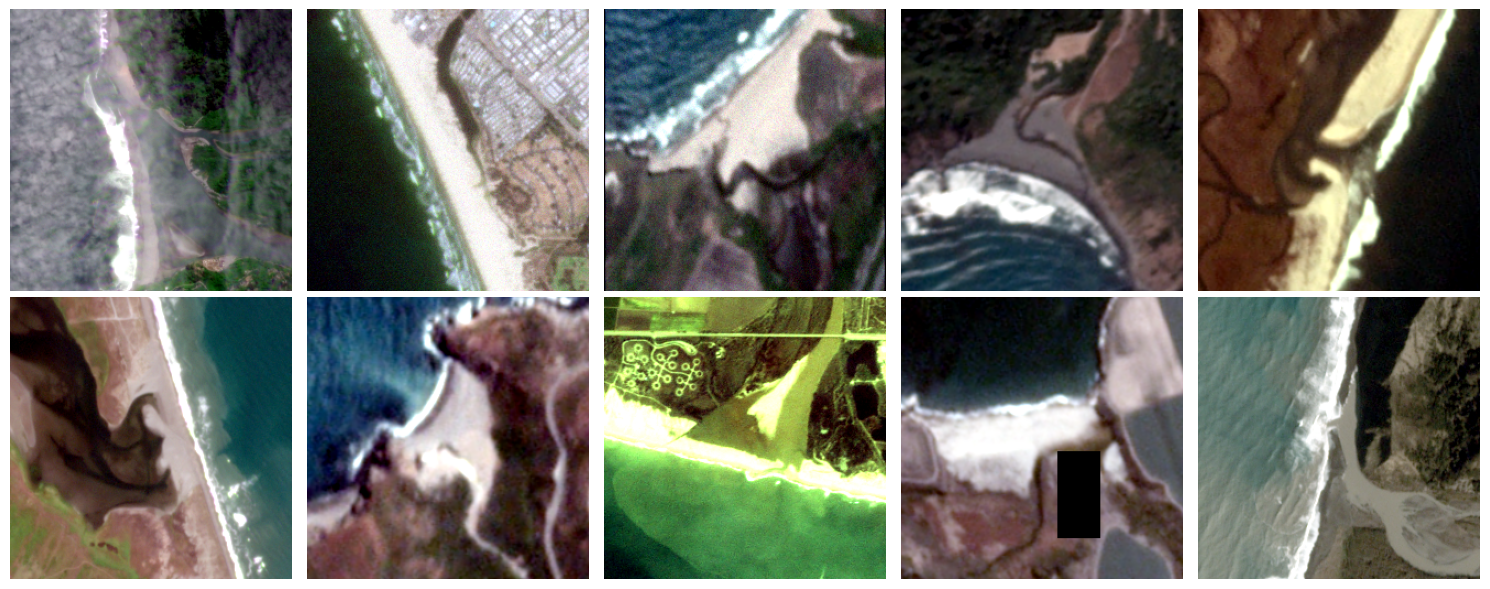

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
idxes = np.random.randint(0, len(ds), 10)
for ax, i in zip(axes.flatten(), idxes, strict=False):
    ax.axis("off")
    data = ds[i]["image"][0]
    data = ds.denormalize(data).detach().cpu().numpy()[0]
    nodata = (data != 0).all(axis=0)
    data = masked_contrast_stretch(data, nodata)
    ax.imshow(data.transpose((1, 2, 0)))

fig.tight_layout()
plt.show()